In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import ast
import os
os.chdir('/home/bojk/Data/') #this is when opened in '/home/bojk/Data/notebooks' on linux Quakelab
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import imp
import HTSeq
from scipy.stats import powerlaw
#import minimetagenome_analysis as minimet
import mock_metagenome_creation as mock
import khmer

In [5]:
imp.reload(mock)
maindir = "Mock/Archaea_illuminaHS_low<20contigs/"
meta = pd.read_pickle('Permafrost/FranklinBluffs/pickles/maindf_withDepth')
data = list(meta['Sequence Length'])

#stats,contigs,kmers = mock.fragment_genomes_make_kmertable(maindir,data,5,'_feb15')

Constructing mock metagenome from Mock/Archaea_illuminaHS_low<20contigs/
 with kmer = 5 took 7004.27 s


In [7]:
imp.reload(mock)
contig6mer,k6mer = mock.make_kmertable_from_fasta_contigs(maindir+'metagenome_from_allgenomes__feb15.fasta',6,maindir+'stats/')    

Constructing 6-mer table from metagenome_from_allgenomes__feb15.fasta took 24560.13 s


In [2]:
maindir = "Mock/Archaea_illuminaHS_low<20contigs/"
imp.reload(mock)
contig6merfast,k6merfast = mock.make_kmertable_from_fasta_contigs(maindir+'metagenome_from_allgenomes__feb15.fasta',6,maindir+'stats/')    

Constructing 6-mer table from metagenome_from_allgenomes__feb15.fasta took 11041.05 s


In [18]:
newcontig = 'ACTTCGAGCGTGATGACTTCGAGCGTGATGACTTCGAGCGTGATGACTTCGAGCGTGATGACTTCGAGCGTGATGACTTCGAGCGTGATGACTTCGAGCGTGATG'
N=4
x=1e9
counts = khmer.Counttable(21,x,N)
counts.consume(newcontig)

85

In [19]:
len(newcontig)-21

84

In [23]:
counts.get('ACTTCGAGCGTGATGACTTCG')

6

22

In [16]:
k6mer_norm = k6mer.divide(contig6mer['Sequence length'],axis=0)

In [20]:
k6mer.head()

,AAAAAA,AAAAAC,AAAAAT,AAAAAG,AAAACA,AAAACC,AAAACT,AAAACG,AAAATA,AAAATC,...,GGGGCT,GGGGCG,GGGGTA,GGGGTC,GGGGTT,GGGGTG,GGGGGA,GGGGGC,GGGGGT,GGGGGG
2681812914_contig_000,2.0,2.0,3.0,3.0,1.0,4.0,1.0,6.0,1.0,5.0,...,2.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0
2681812914_contig_001,0.0,2.0,0.0,2.0,0.0,0.0,2.0,3.0,1.0,2.0,...,1.0,1.0,1.0,2.0,3.0,1.0,1.0,0.0,3.0,1.0
2681812914_contig_002,2.0,3.0,0.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0
2681812914_contig_003,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0
2681812914_contig_004,1.0,1.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0,4.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
k6mer_norm.head()

,AAAAAA,AAAAAC,AAAAAT,AAAAAG,AAAACA,AAAACC,AAAACT,AAAACG,AAAATA,AAAATC,...,GGGGCT,GGGGCG,GGGGTA,GGGGTC,GGGGTT,GGGGTG,GGGGGA,GGGGGC,GGGGGT,GGGGGG
2681812914_contig_000,0.000175577,0.000175577,0.000263366,0.000263366,8.77886e-05,0.000351154,8.77886e-05,0.000526732,8.77886e-05,0.000438943,...,0.000175577,0.000351154,0.000175577,0,8.77886e-05,8.77886e-05,8.77886e-05,0,0.000175577,0
2681812914_contig_001,0,0.000245821,0,0.000245821,0,0,0.000245821,0.000368732,0.000122911,0.000245821,...,0.000122911,0.000122911,0.000122911,0.000245821,0.000368732,0.000122911,0.000122911,0,0.000368732,0.000122911
2681812914_contig_002,0.000289143,0.000433714,0,0.000144571,0.000289143,0.000289143,0.000144571,0.000867428,0.000289143,0.000289143,...,0.000144571,0,0,0,0,0.000144571,0.000578285,0.000144571,0,0
2681812914_contig_003,0,0,0,0.000702741,0,0,0,0.000175685,0,0.000175685,...,0,0.000175685,0.00035137,0.00035137,0,0.00035137,0.000175685,0,0.000175685,0
2681812914_contig_004,0.000162628,0.000162628,0.000325256,0,0.000162628,0.000162628,0.000325256,0.000325256,0.000162628,0.000650512,...,0,0.000325256,0,0.000162628,0,0,0,0,0,0


In [24]:
frac0 = (k6mer_norm == 0).sum(axis=0).divide(len(k6mer_norm)).sort_values()

In [34]:
most_abundant = frac0[frac0<.2].index
len(most_abundant)

992

In [26]:
var6 = k6mer_norm.var().sort_values()

In [35]:
most_variable = var6[-992:].index

In [37]:
len(set(most_abundant).intersection(most_variable))

714

In [43]:
len(set(list(most_abundant)+list(most_variable)))

1270

# tSNE most_ab most_var kmers

In [46]:
clusterlist = list(set(list(most_abundant)+list(most_variable)))

In [47]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [48]:
x = StandardScaler().fit_transform(k6mer_norm[clusterlist])

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
x_emb = TSNE(n_components=2,perplexity=40,random_state=23944).fit_transform(x)

In [56]:
tsne = pd.DataFrame(x_emb,index=k6mer_norm.index)
tsne = tsne.join(contig6mer['Sequence length'])
tsne = tsne.join(contig6mer['GC'])
tsne['genome'] = [f.split('_')[0] for f in tsne.index]

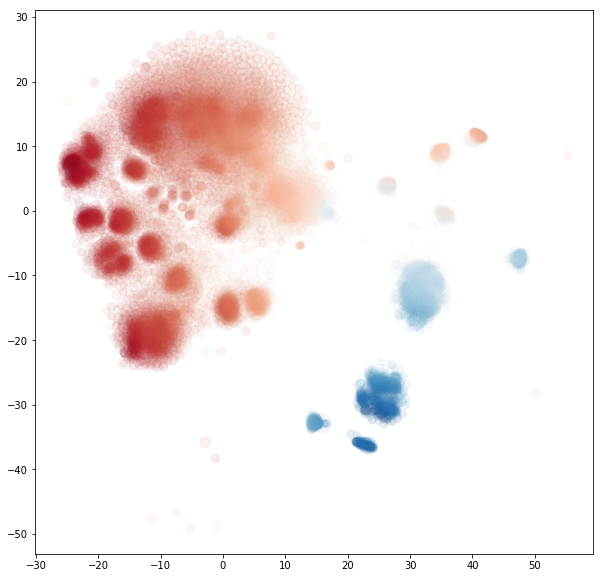

In [57]:
f,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(tsne[0],tsne[1],s=tsne['Sequence length'].astype(float)/100,alpha=.05,c=tsne['GC'],cmap='RdBu_r')


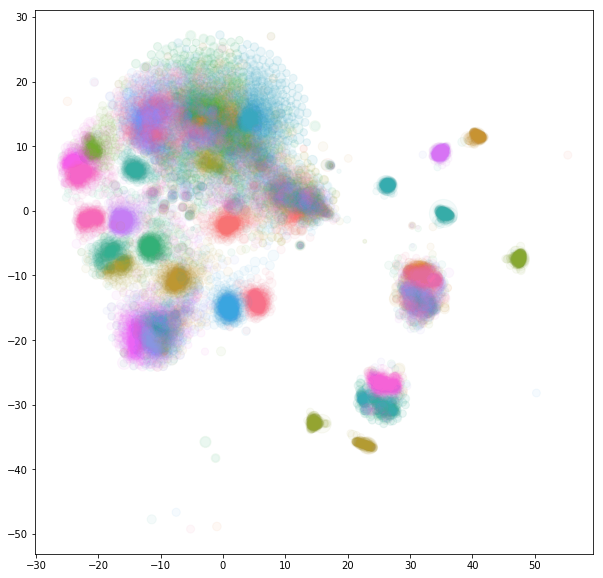

In [58]:
keys = tsne['genome'].unique()
values = sns.color_palette('husl',len(tsne['genome'].unique()))
lut = dict(zip(keys,values))
color = tsne.genome.map(lut)

f,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(tsne[0],tsne[1],s=tsne['Sequence length'].astype(float)/100,alpha=.05,color=color)

# tSNE all kmers

In [52]:
x = StandardScaler().fit_transform(k6mer_norm)

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [53]:
x_emb_all = TSNE(n_components=2,perplexity=40,random_state=23944).fit_transform(x)

In [54]:
tsne = pd.DataFrame(x_emb_all,index=k6mer_norm.index)
tsne = tsne.join(contig6mer['Sequence length'])
tsne = tsne.join(contig6mer['GC'])
tsne['genome'] = [f.split('_')[0] for f in tsne.index]

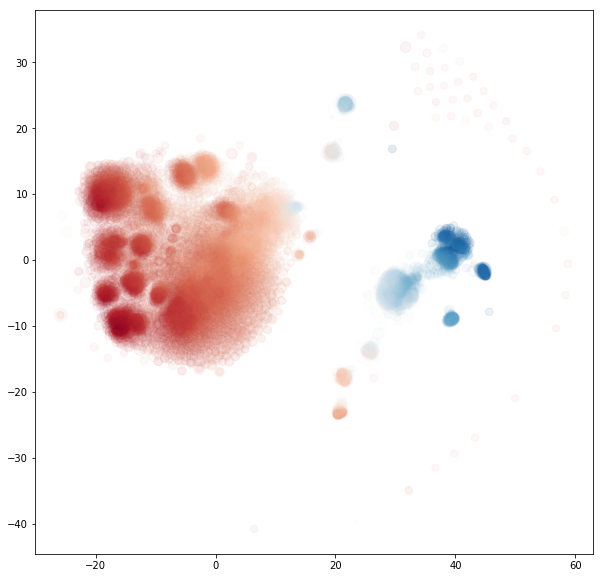

In [55]:
f,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(tsne[0],tsne[1],s=tsne['Sequence length'].astype(float)/100,alpha=.05,c=tsne['GC'],cmap='RdBu_r')


In [ ]:
keys = tsne['genome'].unique()
values = sns.color_palette('husl',len(tsne['genome'].unique()))
lut = dict(zip(keys,values))
color = tsne.genome.map(lut)

f,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(tsne[0],tsne[1],s=tsne['Sequence length'].astype(float)/100,alpha=.05,color=color)